<a href="https://colab.research.google.com/github/Atharva1604/MNIST-Digit-Recognizer-CNN/blob/master/Digit_Recogniser_using_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
#importing files from local storage into google colab
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


**Save the files into dataframes**

In [3]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))


In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Separating the data and label**

In [5]:
train_data = train.loc[:,"pixel0":]
train_label= train.loc[:, "label"]

**Convert train data to numpy array** 

In [6]:
train_data = np.array(train_data)
train_label = tf.keras.utils.to_categorical(train_label, num_classes=10, dtype='float32')

**Convert test data to numpy array**

In [7]:
test_data = test.loc[:, "pixel0":]
test_data = np.array(test_data)


**Reshaping the data from (28,28) to (28,28,1).We write '1' here for keras to know its a greyscale image, it would not actually change the number of values.**

In [8]:
train_data = train_data.reshape(train_data.shape[0],28,28,1)
test_data  = test_data.reshape(test_data.shape[0],28,28,1)

In [9]:
#Normalize the values betwenn 0 to 1
train_data = train_data/255.0
test_data  = test_data/255.0

**DEFINE THE CNN LAYERS**

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (5,5), activation='relu',input_shape=(28,28,1), padding= 'same'),
                                    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', padding='same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same'),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation = 'softmax')
                                   ])

model.compile(optimizer = "adam",
     loss='categorical_crossentropy',
     metrics=['accuracy'])



In [11]:
history = model.fit(train_data,train_label,epochs = 25)

Epoch 1/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1596 - accuracy: 0.9498
Epoch 2/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0619 - accuracy: 0.9809
Epoch 3/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0493 - accuracy: 0.9850
Epoch 4/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0408 - accuracy: 0.9872
Epoch 5/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 6/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0330 - accuracy: 0.9893
Epoch 7/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0285 - accuracy: 0.9915
Epoch 8/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0280 - accuracy: 0.9917
Epoch 9/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 10/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.025

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

**Evaluation and Predictions**

In [14]:
evaluation = model.evaluate(test_data)
print(evaluation)

875/875 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


In [15]:
predictions = model.predict(test_data)
prediction = []

for i in predictions:
    prediction.append(np.argmax(i))

**Storing the predictions**

In [16]:
#making a dataframe to save predictions and data values
submission =  pd.DataFrame({
        "ImageId": test.index+1,
        "Label": prediction
    })

submission.to_csv('submission.csv', index=False)

In [17]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


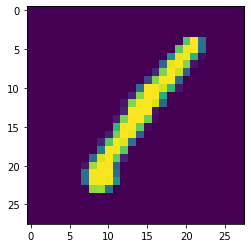

In [20]:
import matplotlib.pyplot as plt
image = train_data[0].reshape(28,28)
plt.imshow(image)

**Use Model to Predict Result for Single Example**

In [23]:
result = model.predict(np.array([train_data[0]]))
predicted_value = np.argmax(result)
print(predicted_value)

1
